In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [6]:
from config import weather_api_key
import requests
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Build Basic URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | talaya
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | constitucion
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | chuy
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | fortuna
Processing Record 14 of Set 1 | broome
Processing Record 15 of Set 1 | umtata
Processing Record 16 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | narsaq
Processing Record 19 of Set 1 | bwanga
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | dikson
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 1 | nicoya
Pro

Processing Record 33 of Set 4 | te anau
Processing Record 34 of Set 4 | pisco
Processing Record 35 of Set 4 | tuatapere
Processing Record 36 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 37 of Set 4 | kifri
Processing Record 38 of Set 4 | praya
Processing Record 39 of Set 4 | tuy hoa
Processing Record 40 of Set 4 | fort nelson
Processing Record 41 of Set 4 | vardo
Processing Record 42 of Set 4 | madison
Processing Record 43 of Set 4 | sijunjung
Processing Record 44 of Set 4 | fort saint james
Processing Record 45 of Set 4 | yerbogachen
Processing Record 46 of Set 4 | batagay
Processing Record 47 of Set 4 | ilulissat
Processing Record 48 of Set 4 | libenge
Processing Record 49 of Set 4 | bafra
Processing Record 50 of Set 4 | diffa
Processing Record 1 of Set 5 | ossora
Processing Record 2 of Set 5 | fort morgan
Processing Record 3 of Set 5 | bonthe
Processing Record 4 of Set 5 | kachiry
Processing Record 5 of Set 5 | williams lake
Processing Record 6 of Set 5 | ota

Processing Record 26 of Set 8 | rimbey
Processing Record 27 of Set 8 | tailai
Processing Record 28 of Set 8 | kuche
City not found. Skipping...
Processing Record 29 of Set 8 | lages
Processing Record 30 of Set 8 | sitka
Processing Record 31 of Set 8 | jackson
Processing Record 32 of Set 8 | lavrentiya
Processing Record 33 of Set 8 | salinopolis
Processing Record 34 of Set 8 | nuuk
Processing Record 35 of Set 8 | union city
Processing Record 36 of Set 8 | saint george
Processing Record 37 of Set 8 | aquiraz
Processing Record 38 of Set 8 | lieksa
Processing Record 39 of Set 8 | burns lake
Processing Record 40 of Set 8 | wanaka
Processing Record 41 of Set 8 | ozernovskiy
Processing Record 42 of Set 8 | filadelfia
Processing Record 43 of Set 8 | baykit
Processing Record 44 of Set 8 | berlevag
Processing Record 45 of Set 8 | anloga
Processing Record 46 of Set 8 | bowen
Processing Record 47 of Set 8 | zhanatas
City not found. Skipping...
Processing Record 48 of Set 8 | coelho neto
Processing

Processing Record 17 of Set 12 | mega
Processing Record 18 of Set 12 | derveni
Processing Record 19 of Set 12 | katobu
Processing Record 20 of Set 12 | jalu
Processing Record 21 of Set 12 | matagami
Processing Record 22 of Set 12 | iqaluit
Processing Record 23 of Set 12 | cuajinicuilapa
Processing Record 24 of Set 12 | rio cuarto
Processing Record 25 of Set 12 | mahajanga
Processing Record 26 of Set 12 | balykshi
Processing Record 27 of Set 12 | adrar
Processing Record 28 of Set 12 | prince george
Processing Record 29 of Set 12 | warqla
City not found. Skipping...
Processing Record 30 of Set 12 | gohpur
Processing Record 31 of Set 12 | kousseri
Processing Record 32 of Set 12 | catamarca
Processing Record 33 of Set 12 | laplace
Processing Record 34 of Set 12 | prince rupert
Processing Record 35 of Set 12 | barcelos
Processing Record 36 of Set 12 | saskatoon
Processing Record 37 of Set 12 | saint marys
Processing Record 38 of Set 12 | broken hill
Processing Record 39 of Set 12 | ardakan


In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,42.82,98,90,10.36,US,2021-07-31 09:33:40
1,Hermanus,-34.4187,19.2345,64.90,60,90,3.56,ZA,2021-07-31 09:33:40
2,Qaanaaq,77.4840,-69.3632,42.35,86,65,2.30,GL,2021-07-31 09:33:40
3,Kapaa,22.0752,-159.3190,80.92,72,90,3.00,US,2021-07-31 09:33:41
4,Lebu,-37.6167,-73.6500,45.28,86,55,13.73,CL,2021-07-31 09:33:41
5,Talaya,61.3833,152.7500,49.10,60,88,1.77,RU,2021-07-31 09:33:41
6,Cape Town,-33.9258,18.4232,67.10,81,0,1.99,ZA,2021-07-31 09:31:21
7,Carnarvon,-24.8667,113.6333,64.47,54,75,10.36,AU,2021-07-31 09:33:42
8,Constitucion,-35.3333,-72.4167,48.81,87,42,6.89,CL,2021-07-31 09:33:42
9,Ushuaia,-54.8000,-68.3000,38.86,52,0,5.75,AR,2021-07-31 09:33:43


In [10]:
new_column_order = ['City', 'Country', 'Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2021-07-31 09:33:40,71.2906,-156.7887,42.82,98,90,10.36
1,Hermanus,ZA,2021-07-31 09:33:40,-34.4187,19.2345,64.90,60,90,3.56
2,Qaanaaq,GL,2021-07-31 09:33:40,77.4840,-69.3632,42.35,86,65,2.30
3,Kapaa,US,2021-07-31 09:33:41,22.0752,-159.3190,80.92,72,90,3.00
4,Lebu,CL,2021-07-31 09:33:41,-37.6167,-73.6500,45.28,86,55,13.73
...,...,...,...,...,...,...,...,...,...
553,Florianopolis,BR,2021-07-31 09:37:24,-27.6146,-48.5012,51.42,82,40,4.61
554,Palu,ID,2021-07-31 09:37:24,-0.8917,119.8707,79.00,92,55,2.26
555,Chara,RU,2021-07-31 09:37:25,56.9064,118.2631,63.07,51,88,11.45
556,Bathsheba,BB,2021-07-31 09:37:25,13.2167,-59.5167,81.21,83,40,16.11


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

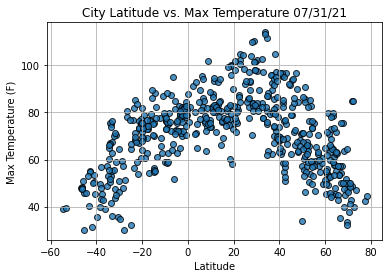

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor='black', linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

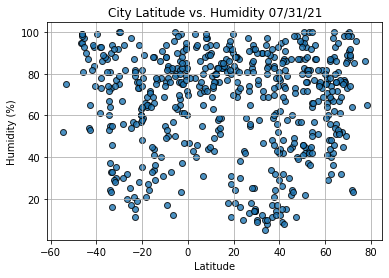

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

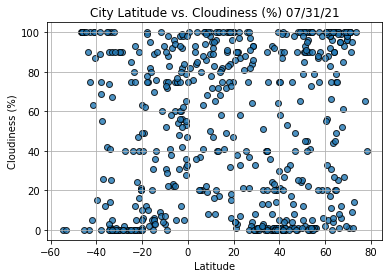

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

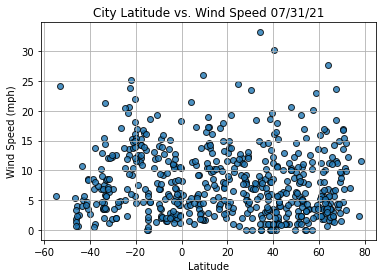

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
city_data_df = pd.read_csv("./weather_data/cities.csv")
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                       Broome
Country                        US
Date          2021-07-31 09:33:44
Lat                       42.2506
Lng                       -75.833
Max Temp                    50.81
Humidity                       96
Cloudiness                      0
Wind Speed                   1.68
Name: 13, dtype: object

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Barrow,US,2021-07-31 09:33:40,71.2906,-156.7887,42.82,98,90,10.36
2,2,Qaanaaq,GL,2021-07-31 09:33:40,77.4840,-69.3632,42.35,86,65,2.30
3,3,Kapaa,US,2021-07-31 09:33:41,22.0752,-159.3190,80.92,72,90,3.00
5,5,Talaya,RU,2021-07-31 09:33:41,61.3833,152.7500,49.10,60,88,1.77
12,12,Fortuna,US,2021-07-31 09:33:44,40.5982,-124.1573,62.42,95,90,1.01


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

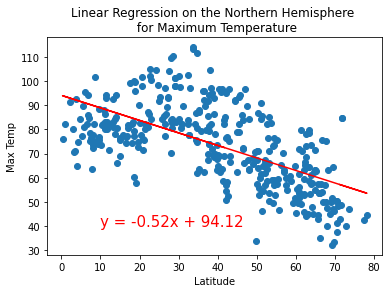

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

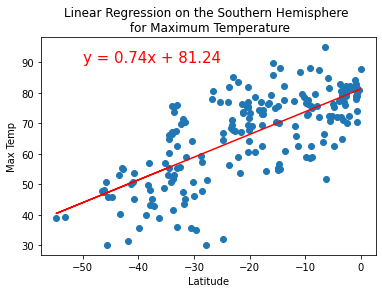

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

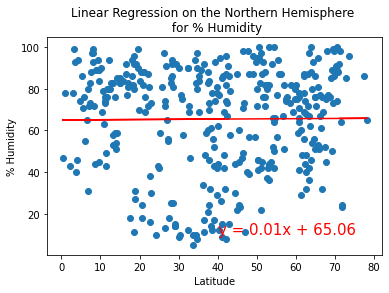

In [23]:
# Linear regression on the Northern Hemisphere for % Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

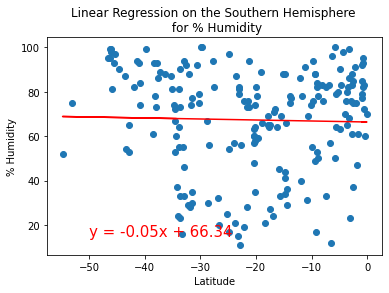

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

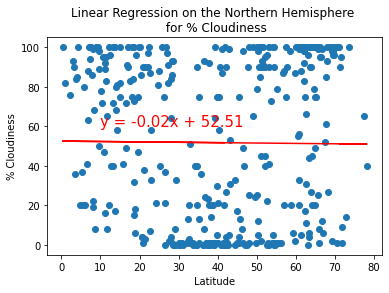

In [25]:
# Linear regression on the Northern Hemisphere for % Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,60))

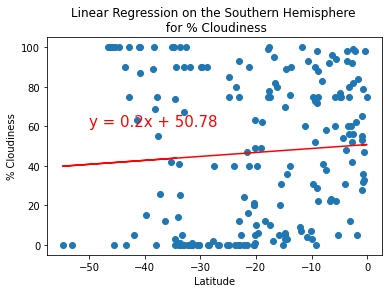

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

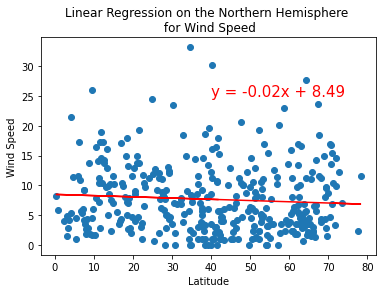

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,25))

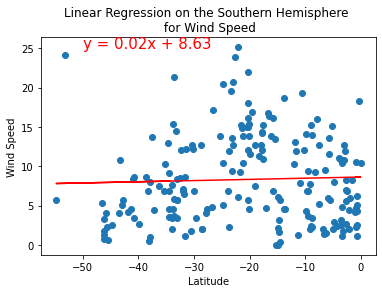

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))